# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
%matplotlib inline

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv('craftcans.csv')

## How many rows do you have in the data? What are the column types?

In [3]:
df.shape

(2416, 7)

In [4]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

In [5]:
df.columns

Index(['Beer', 'Brewery', 'Location', 'Style', 'Size', 'ABV', 'IBUs'], dtype='object')

In [6]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [7]:
df['Brewery'].value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [8]:
df['ABV'] = df['ABV'].str.replace('%', '')

In [9]:
df['ABV'] = pd.to_numeric(df['ABV'])

In [10]:
df['ABV'].value_counts()

5.0     215
5.5     158
6.0     125
6.5     123
5.2     107
7.0      92
4.5      89
4.8      72
5.8      66
5.6      66
5.1      62
5.3      60
6.2      59
4.9      59
8.0      57
4.7      57
5.7      52
6.8      52
5.4      50
7.5      43
4.0      38
6.3      38
4.2      38
7.2      37
9.9      35
5.9      34
6.9      32
4.6      32
8.5      26
6.7      25
       ... 
4.1       9
9.5       9
7.4       8
8.3       8
7.9       7
8.8       6
3.8       6
3.5       6
7.6       5
9.6       5
9.3       5
9.7       5
3.7       4
8.1       4
8.6       4
3.2       3
9.1       3
8.4       3
9.8       3
8.9       2
2.7       2
3.4       1
12.5      1
10.0      1
10.4      1
0.1       1
12.0      1
2.8       1
9.4       1
12.8      1
Name: ABV, Length: 74, dtype: int64

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [11]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25


### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [40]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [12]:
df.ABV.median()

5.6

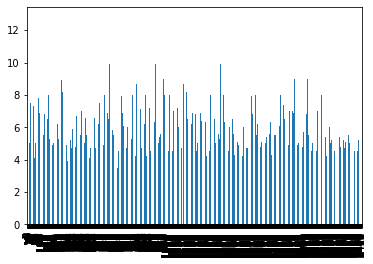

In [13]:
df.ABV.plot(kind="bar")

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [14]:
df.ABV.isna().sum()

68

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [15]:
df['Location'].value_counts()

Grand Rapids, MI          66
Chicago, IL               55
Portland, OR              52
Indianapolis, IN          43
San Diego, CA             42
Boulder, CO               41
Denver, CO                40
Brooklyn, NY              38
Seattle, WA               35
Longmont, CO              33
San Francisco, CA         32
Tampa, FL                 31
Stevens Point, WI         30
Austin, TX                25
Fort Collins, CO          22
Boston, MA                21
Cincinnati, OH            21
Aurora, IN                20
Chandler, AZ              19
Saint Louis, MO           19
Eagle, CO                 19
Boonville, CA             18
Manhattan, KS             18
Davenport, IA             18
Missoula, MT              18
Boise, ID                 17
Salt Lake City, UT        17
Durango, CO               16
Minneapolis, MN           16
San Antonio, TX           16
                          ..
Jacksonville Beach, FL     1
Lombard, IL                1
Manheim, PA                1
Conestoga, PA 

## List all of the beer from Brooklyn, NY

In [16]:
df[df.Location == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most cans of beer?

In [17]:
df[df.Location == 'Brooklyn, NY']['Beer'].value_counts()

East India Pale Ale                2
Bikini Beer                        1
Sweet Action                       1
Hipster Ale (Two Roads Brewing)    1
Brooklyn Lager (16 oz.)            1
Brownstone                         1
Abigale                            1
Righteous Ale                      1
Rad                                1
Diesel                             1
Molotov Lite                       1
Jammer                             1
KelSo Nut Brown Lager              1
Harbinger                          1
Brooklyn Summer Ale                1
The Crisp (2011)                   1
Autumnation (2011-12) (2011)       1
Nomader Weiss                      1
Brooklyn Summer Ale (2011)         1
KelSo Pilsner                      1
KelSo India Pale Ale               1
Apollo                             1
Global Warmer                      1
Righteous Ale (2011)               1
Bengali                            1
Bengali Tiger (2011)               1
4Beans                             1
H

## What are the five most popular styles of beer produced by Sixpoint?

In [18]:
df[df.Brewery == 'Sixpoint Craft Ales']['Beer'].value_counts().head(5)

Bengali Tiger (2011)    1
Sensi Harvest           1
Bengali                 1
Bengali Tiger           1
Harbinger               1
Name: Beer, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [19]:
df.Location[0].find('NY')

-1

In [20]:
sum(df.Location.isna())

6

In [21]:
df.Location.str.match('^.+NY', na = 0)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2386    False
2387    False
2388    False
2389    False
2390    False
2391    False
2392    False
2393    False
2394    False
2395    False
2396    False
2397    False
2398    False
2399    False
2400    False
2401    False
2402    False
2403    False
2404    False
2405    False
2406    False
2407    False
2408    False
2409    False
2410    False
2411    False
2412    False
2413    False
2414    False
2415    False
Name: Location, Length: 2416, dtype: object

In [22]:
df[df.Location.isna()]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2025,12 oz.,NaN,NaN,NaN,NaN,NaN,NaN
2160,(24 oz.),NaN,NaN,NaN,NaN,NaN,NaN
2226,(12 oz.),NaN,NaN,NaN,NaN,NaN,NaN
2276,(12 oz.),NaN,NaN,NaN,NaN,NaN,NaN
2374,(16 oz.) (2010),NaN,NaN,NaN,NaN,NaN,NaN
2376,(16 oz.) (2010),NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df[(df.Location.isna()==False) & (df.Location.str.match('^.+NY'))]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
598,8 Barrel,Chatham Brewing,"Chatham, NY",American Strong Ale,16 oz.,8.0,69
599,Oktoberfest,Chatham Brewing,"Chatham, NY",Märzen / Oktoberfest,16 oz.,5.5,40
628,Cream Ale,Newburgh Brewing Company,"Newburgh, NY",Cream Ale,12 oz.,4.2,35


### Now *count* all of the breweries in New York state

In [24]:
df.Location.str.match('^.+NY', na = 0).value_counts()

False    2342
True       74
Name: Location, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [25]:
df.Style.str.match('^.+IPA', na = False)

0        True
1       False
2       False
3       False
4       False
5       False
6        True
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14       True
15      False
16      False
17       True
18      False
19      False
20      False
21      False
22      False
23      False
24       True
25       True
26      False
27       True
28      False
29      False
        ...  
2386    False
2387     True
2388    False
2389    False
2390    False
2391    False
2392    False
2393    False
2394     True
2395    False
2396    False
2397    False
2398    False
2399    False
2400    False
2401    False
2402    False
2403     True
2404    False
2405    False
2406     True
2407    False
2408     True
2409    False
2410    False
2411    False
2412     True
2413    False
2414     True
2415    False
Name: Style, Length: 2416, dtype: bool

In [26]:
df[df.Style.str.match('^.+IPA', na = False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
33,Villager,Fort Point Beer Company,"San Francisco, CA",American IPA,12 oz.,6.3,42
38,HopArt,COAST Brewing Company,"Charleston, SC",American IPA,16 oz.,7.7,Does not apply
39,Boy King,COAST Brewing Company,"Charleston, SC",American Double / Imperial IPA,16 oz.,9.7,Does not apply


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [27]:
df['IBUs'] = df['IBUs'].str.replace('Does not apply', '0')

In [28]:
df['IBUs'] = pd.to_numeric(df['IBUs'])

In [29]:
df.IBUs.mean()

24.90124481327801

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

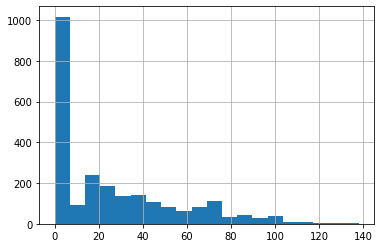

In [30]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [31]:
df[df['IBUs'] > 75]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
68,Csar,Tin Man Brewing Company,"Evansville, IN",Russian Imperial Stout,16 oz.,12.0,90.0
79,The Gadget,Four Fathers Brewing,"Valparaiso, IN",American IPA,16 oz.,6.4,90.0
89,Gone A-Rye,Cedar Creek Brewery,"Seven Points, TX",American Double / Imperial IPA,16 oz.,8.5,90.0
93,Heavy Lifting,Boulevard Brewing Company,"Kansas City, MO",American IPA,12 oz.,6.2,80.0
110,Jah Mon,Rivertowne Brewing Company,"Export, PA",American IPA,12 oz.,5.0,100.0


## List all of the beers with IBUs below the 25th percentile

In [32]:
df[df['IBUs'] < 25]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
11,Flesh Gourd'n,Against the Grain Brewery,"Louisville, KY",Pumpkin Ale,16 oz.,6.6,21.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
16,Kamen Knuddeln,Against the Grain Brewery,"Louisville, KY",American Wild Ale,16 oz.,6.5,0.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0
20,Leisure Time,Jack's Abby Craft Lagers,"Framingham, MA",American Pale Lager,12 oz.,4.8,15.0
26,Jucundus,Mike Hess Brewing Company,"San Diego, CA",Wheat Ale,16 oz.,6.0,24.0
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [33]:
df.groupby('Beer')['IBUs'].mean()

Beer
#001 Golden Amber Lager                     0.0
#002 American I.P.A.                       60.0
#003 Brown & Robust Porter                  0.0
#004 Session I.P.A.                        38.0
#9                                         20.0
(12 oz.)                                    NaN
(16 oz.) (2010)                             NaN
(24 oz.)                                    NaN
077XX                                      80.0
10 Degrees of Separation                    0.0
10 Ton                                      0.0
113 IPA                                   113.0
11th Hour IPA                               0.0
12 Man Pale Ale                             0.0
12 oz.                                      NaN
12th Round                                 78.0
13 Rebels ESB                              42.0
1327 Pod's ESB                             37.0
1335 Wicked Snout                           0.0
1492                                        0.0
14° ESB                            

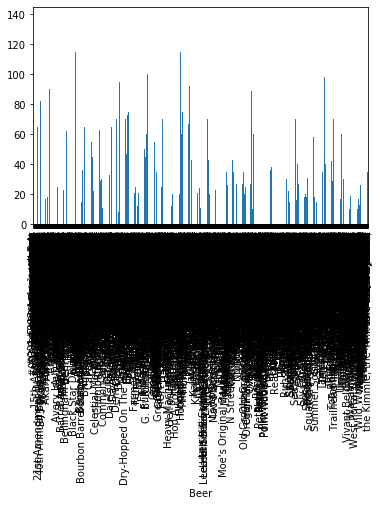

In [34]:
df.groupby('Beer')['IBUs'].mean().plot(kind = 'bar')

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [35]:
df.Beer.value_counts().head()

Nonstop Hef Hop           12
Oktoberfest                6
Dale's Pale Ale            6
Longboard Island Lager     4
1327 Pod's ESB             3
Name: Beer, dtype: int64

In [36]:
df.IBUs.describe()

count    2410.000000
mean       24.901245
std        28.919109
min         0.000000
25%         0.000000
50%        18.000000
75%        41.000000
max       138.000000
Name: IBUs, dtype: float64

In [37]:
df[df.IBUs>=41.000000].Beer.value_counts().head()

Dale's Pale Ale                   6
Dagger Falls IPA                  3
Hop Slayer Double IPA (2011)      2
BLAKKR                            2
Northern Lights India Pale Ale    2
Name: Beer, dtype: int64

In [38]:
df[df.IBUs<=0.000000].Beer.value_counts().head()


Oktoberfest                  4
Angry Orchard Crisp Apple    2
The Deuce                    2
Lazy Daze Lager              2
Miner's Gold                 2
Name: Beer, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

## Draw a histogram of the IBUs of those beers

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!

If you made it this far you deserve a drink.